# Deep Computer Vision

Used to classify images with a ***convolutional neural network***.
[Based On](https://colab.research.google.com/drive/1ZZXnCjFEOkp_KdNcNabd14yok0BAIuwS#forceEdit=true&sandboxMode=true&scrollTo=tdqlqfhLCHZl)

## Core Concepts:

* Image Data
* Convolutional Layer
* Pooling Layer
* CNN Architectures

### Image Data

Consits of three dimensions:
* height
* width
* color channels (usually red, green, blue. numeric values 0-255)

### Convolutional Neural network

Each network is made up of one or more convolutional layers. ***Goal:*** find patterns in the image and use them to classify the image or parts of it.

Fundameltal difference between densly connected neural network and convolutional layers: dense layers detect patterns globally while convolutional layers detect patterns locally.

This is useful because a ***dense layer*** would look at all the pixels in the image and generate output with that information (e.g. cat picture). A simple flip of the image would return a different result.

A ***convolutional layer*** will look at speicfic parts of the image and can learn patterns (like cat ear, eyes, nose...).

### Multiple Convolutional layers
In this very basic example we use three layers. These layers increase the complexity and abstraction at each subsequent layer.

### Feature Maps
A 3D tensor with width, height and depth axis.
Convolutional layer takes feature maps as input and return a new feature map (response map) that represents prescence of specific filters from the previous feature map.

## Layer Parameters

### Filters
m x n pattern of pixels that we are looking for in the image.
Numer of filters is how many patterns we want to recognize.
Filter with depth of 32 means 32 different patterns.
Each layer will have a matrix of values indicating if the filter was present.

### Borders and Padding

The filter does not always fit the end of the picture, so we can introduce padding to fit it closer to its dimensions. So every pixel can be in the center of the filter.

### Strides

Filters slide through the images. This represents the amount of rows / colums the filter is moved every time.

### Pooling

Covnets are made up from pooing layers.
Downsample the feature maps and reduces complexity.
Reduces size of feature maps, usually in window size of 2x2 and stride of 2.
Returned response map is two times smaller.

## Creating a Convnet

### CIFAR Image Dataset

The dataset used here consits of 10 different classe of everyday object like airplane, bird or truck.
It contains 60,000 32x32 color images with 6000 images of each class.

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
# dataset consists of 60000 32x32 colour images in 10 classes
# load and split data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the data: pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# The labels are everyday objects
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

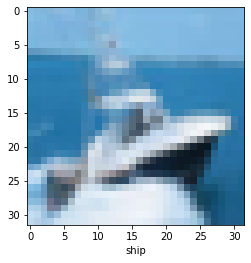

In [6]:
# Let's look at an image
image_index = 8
plt.imshow(train_images[image_index] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[image_index][0]])
plt.show()

## CNN Architecture

A stack of Conv2D and MaxPooling2D layers (extract the feature), followed by densely connected layers (determine presence of features).

In [7]:
# Building the Convloutional Base
model = models.Sequential()

# input shape is 32,32,2 => processes 32 filters over 3x3 filter size over the input data
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# max pooling operation using 2x2 samples and stride of 2
model.add(layers.MaxPooling2D((2, 2)))

# other layers take input from prevoius layers
# increase the filter frequency from 32 to 64
# data shrinks in spacial dimensions, we can afford to add more depth computationally
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# The depth of the image increases, the spacial dimensions reduce drastically
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## Adding the dense layers
After the convolutional base we add a dense layer to classify the extracted features.

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


# the flatten layer changes the shape of our data
# can be fed to the 64-node dense layer
# the final output layer has 10 neurons, one for each class
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## Training
Using the recommended parameters.

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 27s 545us/sample - loss: 1.4871 - accuracy: 0.4583 - val_loss: 1.2890 - val_accuracy: 0.5373
Epoch 2/10
50000/50000 [==============================] - 27s 543us/sample - loss: 1.1402 - accuracy: 0.5989 - val_loss: 1.0986 - val_accuracy: 0.6028
Epoch 3/10
50000/50000 [==============================] - 35s 693us/sample - loss: 0.9907 - accuracy: 0.6522 - val_loss: 1.0024 - val_accuracy: 0.6482
Epoch 4/10
50000/50000 [==============================] - 30s 601us/sample - loss: 0.8974 - accuracy: 0.6871 - val_loss: 0.9927 - val_accuracy: 0.6555
Epoch 5/10
50000/50000 [==============================] - 27s 537us/sample - loss: 0.8236 - accuracy: 0.7136 - val_loss: 0.8931 - val_accuracy: 0.6890
Epoch 6/10
50000/50000 [==============================] - 27s 536us/sample - loss: 0.7664 - accuracy: 0.7321 - val_loss: 0.8854 - val_accuracy: 0.6923
Epoch 7/10
50000/50000 [====================

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

10000/1 - 2s - loss: 0.7978 - accuracy: 0.7046
0.7046


## Working with small datasets
Having only a small dataset we can use the same image, but modified. Like shifted, flipped, zoomed, stretched or rotated. Model should get better at generalising.

Using the ```ImageDataGenerator``` from keras.
Takes parameters to randomly change a picture.
This is called Data Augmentation.

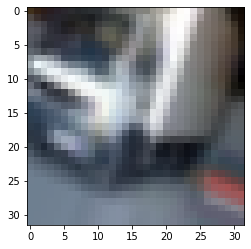

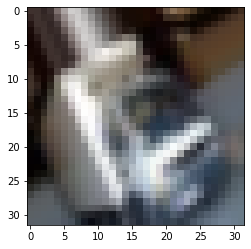

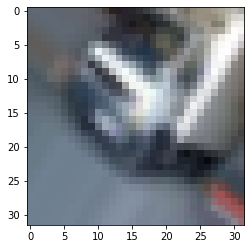

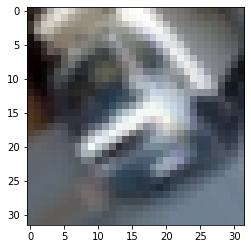

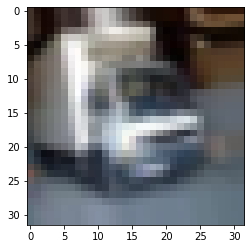

In [13]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[2001]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()
